Estudiaremos los datos de ventas de uno de los minoristas más grandes del mundo. Averigüemos qué factores influyen en sus ingresos. ¿Pueden factores como la temperatura del aire y el coste del combustible influir en el éxito de una gran empresa junto con el índice de poder adquisitivo y los descuentos estacionales? ¿Y cómo minimiza el aprendizaje automático los costos y aumenta el impacto económico?

    Tienda: Número de tienda
    Fecha: Fecha de inicio de la semana de ventas.
    Ventas_semanales: Ventas
    Holiday_Flag: Marca la presencia o ausencia de un día festivo
    Temperatura: Temperatura del aire en la región.
    Fuel_Price: Costo del combustible en la región.
    IPC: índice de precios al consumo
    Desempleo: Tasa de desempleo

Claro, con los datos proporcionados, puedes aplicar varios modelos de aprendizaje automático supervisado para minimizar costos y aumentar el impacto económico. Aquí hay cinco ideas:

1. **Regresión Lineal Múltiple**:
   - Utiliza todas las características (Tienda, Fecha, Holiday_Flag, Temperatura, Fuel_Price, IPC, Desempleo) para predecir las Ventas Semanales.
   - Este modelo proporcionará una comprensión básica de cómo las diferentes características afectan las ventas.

2. **Random Forest Regressor**:
   - Utiliza un ensamblaje de árboles de decisión para predecir las ventas semanales.
   - Puede manejar datos no lineales y capturar interacciones complejas entre las características.

3. **Gradient Boosting Regressor**:
   - Similar al Random Forest, pero en lugar de entrenar árboles de decisión independientes, los entrena secuencialmente, corrigiendo los errores del modelo anterior.
   - Puede proporcionar predicciones más precisas que Random Forest en algunos casos.

4. **Red Neuronal Artificial (RNA)**:
   - Diseña una red neuronal con capas densamente conectadas para aprender patrones complejos en los datos.
   - Puede capturar relaciones no lineales entre las características y las ventas semanales.

5. **Serie Temporal con Redes Neuronales Recurrentes (RNN)**:
   - Considera tratar las ventas semanales como una serie temporal y utiliza una arquitectura de red neuronal recurrente (RNN) para modelar la secuencia temporal.
   - Puede capturar las tendencias y estacionalidades en los datos de ventas semanales.

Antes de elegir un modelo, es esencial dividir los datos en conjuntos de entrenamiento y prueba, y realizar validación cruzada para evaluar el rendimiento de cada modelo. Además, puedes ajustar los hiperparámetros de cada modelo para optimizar su rendimiento.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("C:\\Users\\Usuario\\Desktop\\MIGUEL\\LIBROS DE ESTUDIO\\PROGRAMACIÓN\\CURSO DE PYTHON\\proyectos de practica de analisis de datos\\Datasets\\Walmart_sales.csv")
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [3]:
df.shape

(6435, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df.duplicated().value_counts()

False    6435
dtype: int64

In [7]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

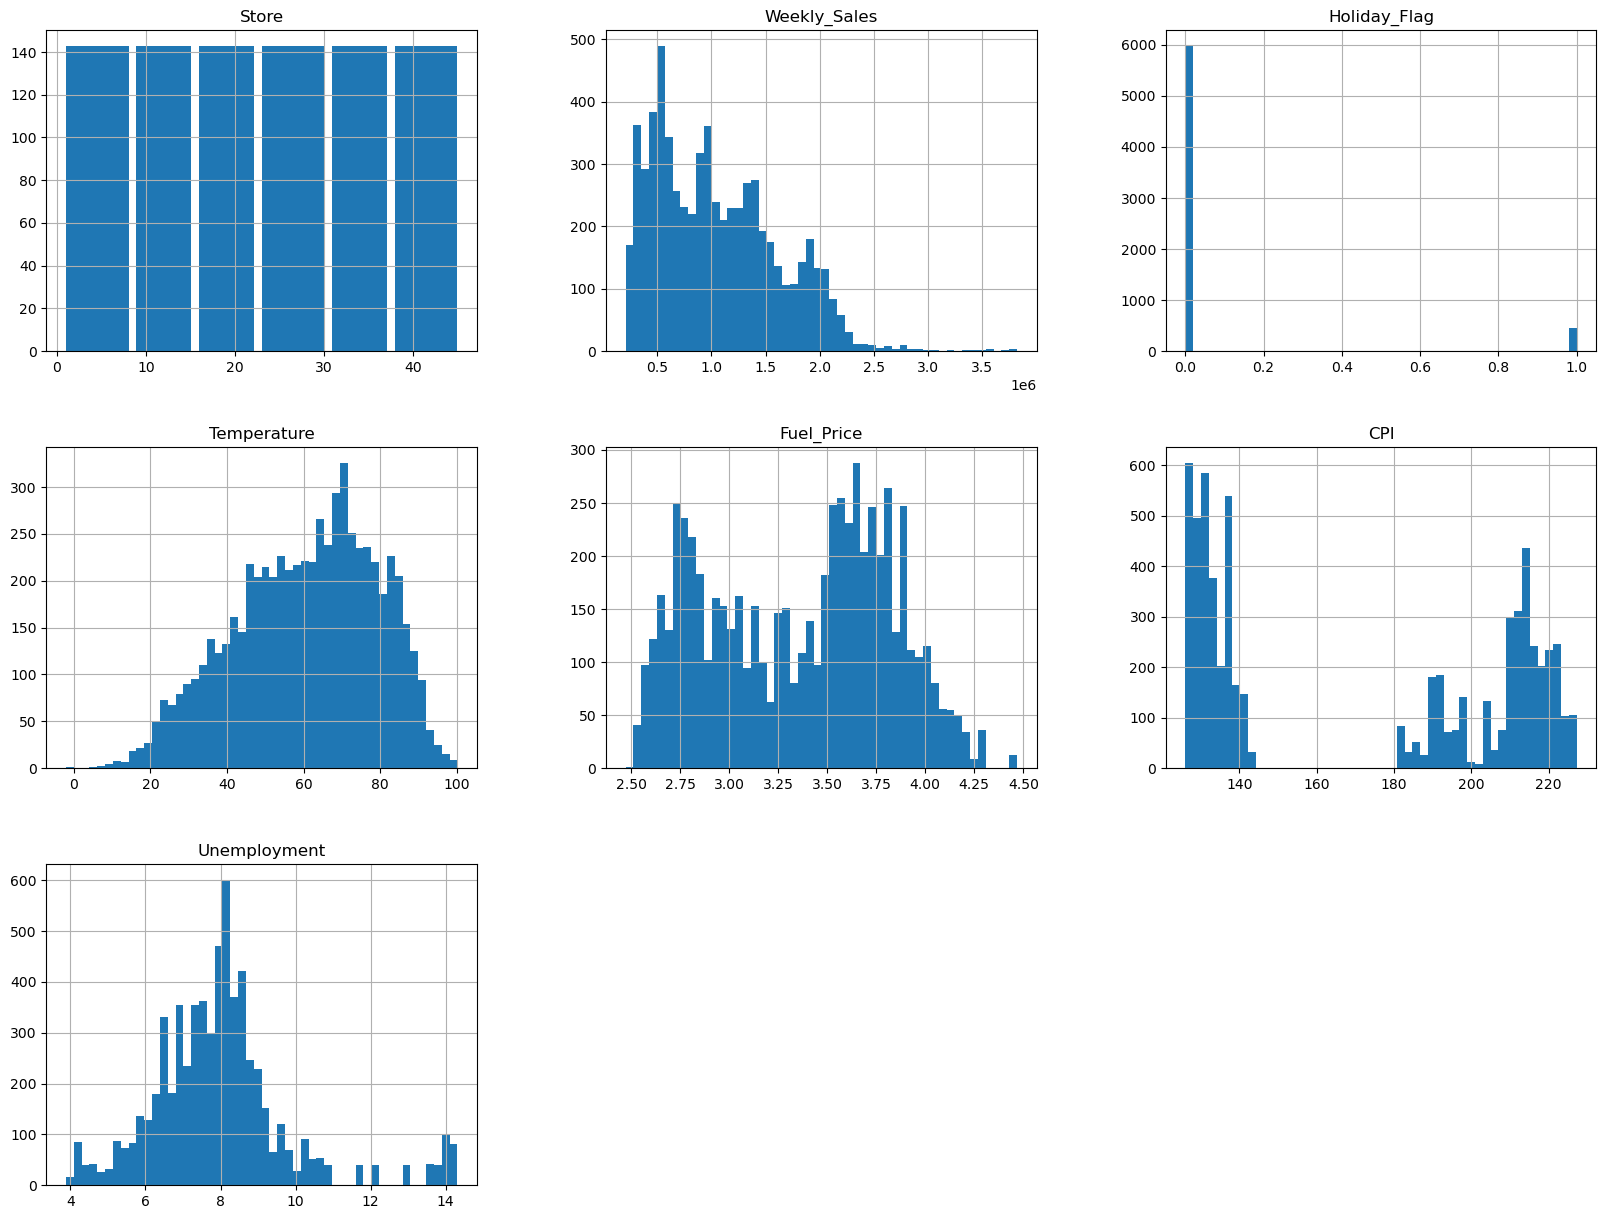

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
corr= df.corr()
corr

Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store         1.000000e+00     -0.335332 -4.386841e-16    -0.022659   
Weekly_Sales -3.353320e-01      1.000000  3.689097e-02    -0.063810   
Holiday_Flag -4.386841e-16      0.036891  1.000000e+00    -0.155091   
Temperature  -2.265908e-02     -0.063810 -1.550913e-01     1.000000   
Fuel_Price    6.002295e-02      0.009464 -7.834652e-02     0.144982   
CPI          -2.094919e-01     -0.072634 -2.162091e-03     0.176888   
Unemployment  2.235313e-01     -0.106176  1.096028e-02     0.101158   

              Fuel_Price       CPI  Unemployment  
Store           0.060023 -0.209492      0.223531  
Weekly_Sales    0.009464 -0.072634     -0.106176  
Holiday_Flag   -0.078347 -0.002162      0.010960  
Temperature     0.144982  0.176888      0.101158  
Fuel_Price      1.000000 -0.170642     -0.034684  
CPI            -0.170642  1.000000     -0.302020  
Unemployment   -0.034684 -0.302020      1.000000

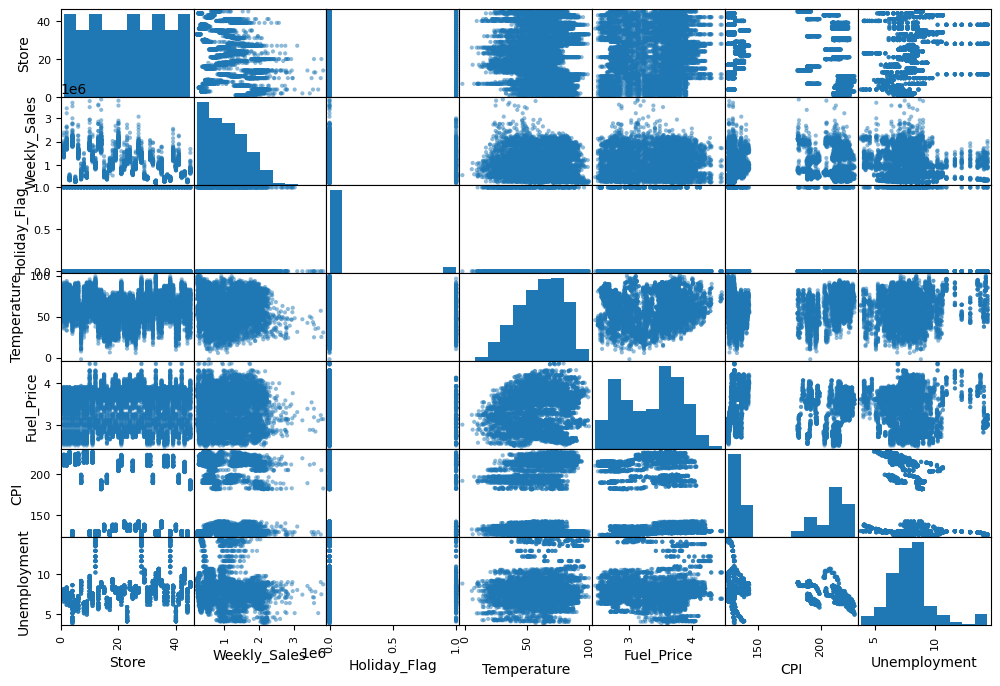

In [10]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(12,8))
plt.show()

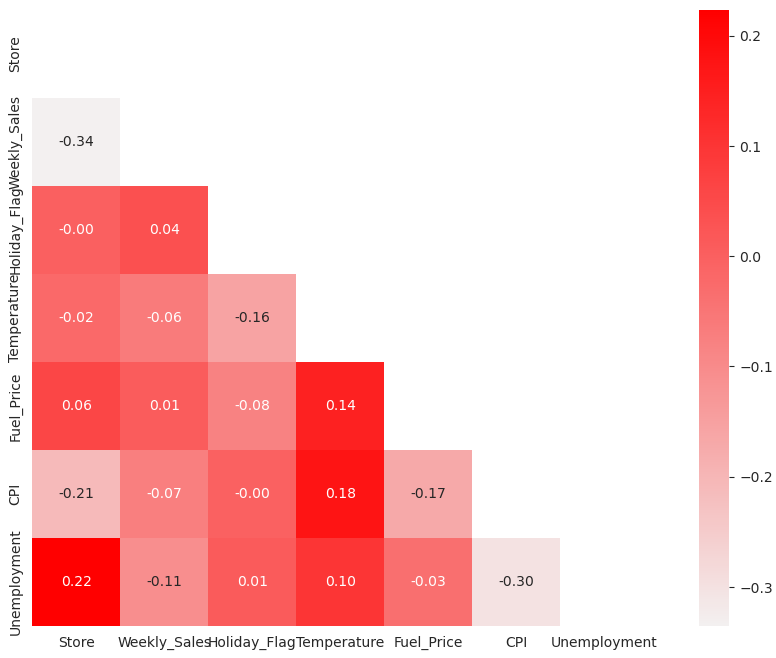

In [11]:
cores = sns.color_palette('light:red', as_cmap=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(corr, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)

Text(0.5, 0, 'Weekly_Sales')

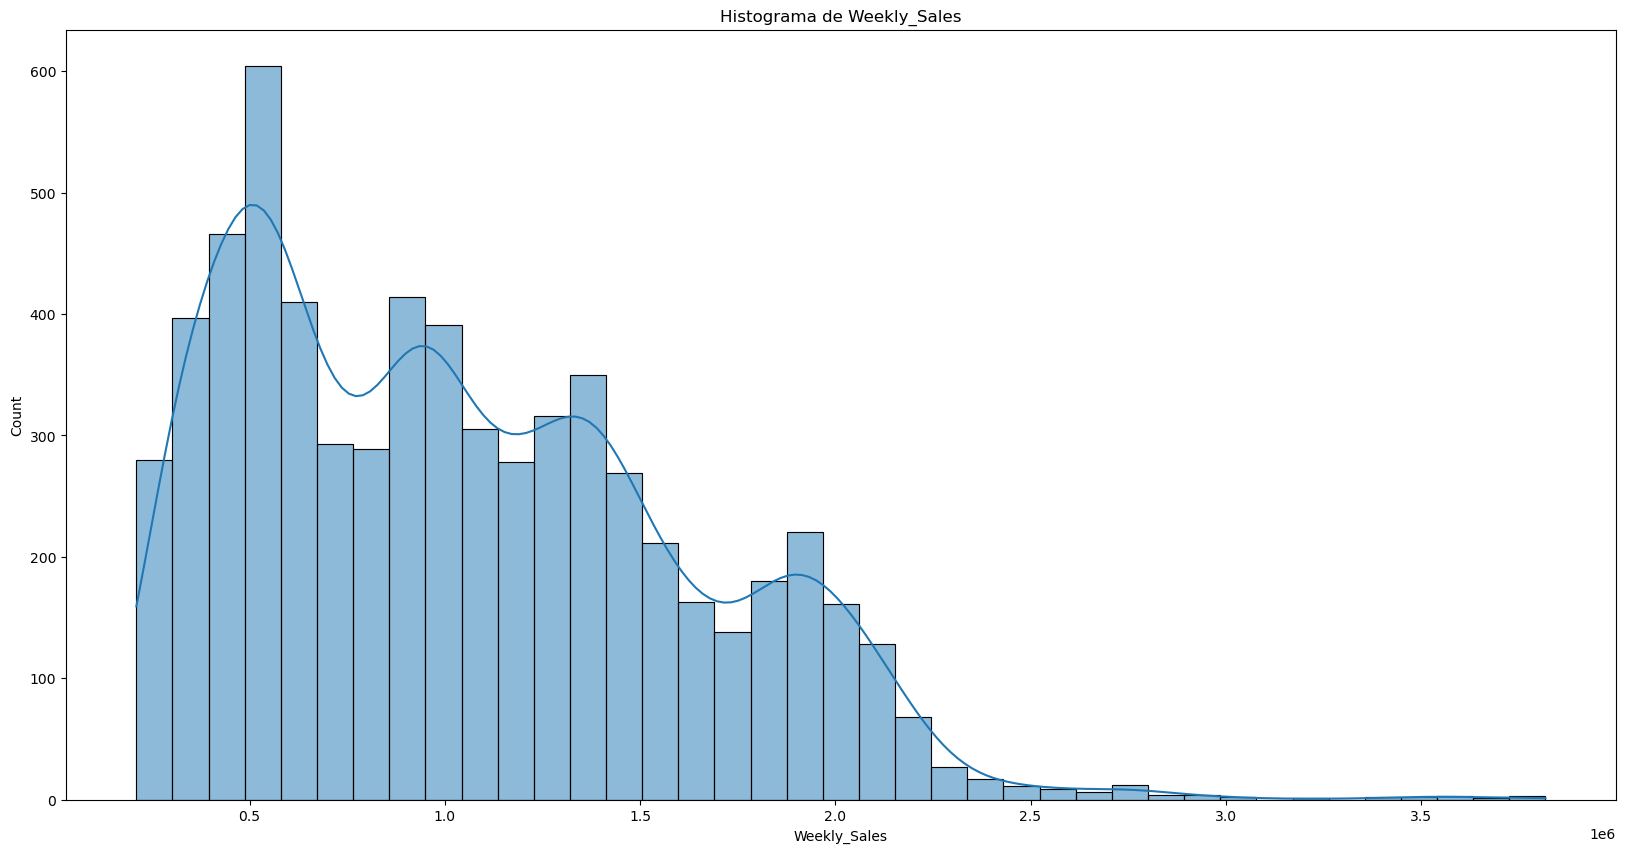

In [12]:
ax = sns.histplot(data=df, x='Weekly_Sales', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de Weekly_Sales')
ax.set_xlabel('Weekly_Sales')

In [13]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)
datos_transformados = transformer.transform(df.select_dtypes(exclude=['object']))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:205: RuntimeWarning: invalid value encountered in log1p
  return func(X, **(kw_args if kw_args else {}))


In [14]:
columnas_datos_tranformados = df.select_dtypes(exclude=['object']).columns

df_transformado = pd.concat([df.select_dtypes(include=['object']), pd.DataFrame(datos_transformados, columns=columnas_datos_tranformados)], axis=1)
df_transformado.head()

Date     Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0  05-02-2010  0.693147     14.312455      0.000000     3.768384    1.273126   
1  12-02-2010  0.693147     14.311400      0.693147     3.676554    1.266384   
2  19-02-2010  0.693147     14.292967      0.000000     3.711863    1.256755   
3  26-02-2010  0.693147     14.158908      0.000000     3.863463    1.270041   
4  05-03-2010  0.693147     14.256862      0.000000     3.860730    1.287854   

        CPI  Unemployment  
0  5.357041      2.208934  
1  5.357728      2.208934  
2  5.357949      2.208934  
3  5.358093      2.208934  
4  5.358237      2.208934

In [15]:
df_transformado.drop('Date', axis=1, inplace=True)

In [16]:
df_transformado.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price       CPI  \
0  0.693147     14.312455      0.000000     3.768384    1.273126  5.357041   
1  0.693147     14.311400      0.693147     3.676554    1.266384  5.357728   
2  0.693147     14.292967      0.000000     3.711863    1.256755  5.357949   
3  0.693147     14.158908      0.000000     3.863463    1.270041  5.358093   
4  0.693147     14.256862      0.000000     3.860730    1.287854  5.358237   

   Unemployment  
0      2.208934  
1      2.208934  
2      2.208934  
3      2.208934  
4      2.208934

In [17]:
df_transformado.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     1
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [18]:
df_transformado[df_transformado['Temperature'].isnull()]

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price       CPI  \
910  2.079442     13.232166           0.0          NaN    1.389041  5.261459   

     Unemployment  
910      2.284217

In [19]:
# Remplazar NaN en la columna 'Columna' con la media de esa columna
df_transformado['Temperature'].fillna(df_transformado['Temperature'].mean(), inplace=True)

In [20]:
df_transformado.loc[910, 'Temperature']

4.066454513609232

In [21]:
print(columnas_datos_tranformados)

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')


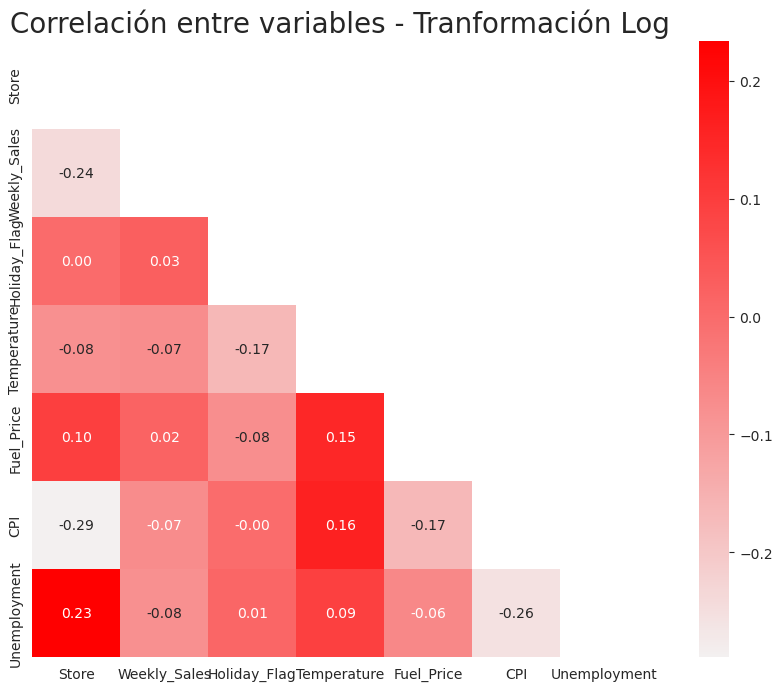

In [22]:
correlacion_transformada = df_transformado.corr()
mask = np.zeros_like(correlacion_transformada)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacion_transformada, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)
    ax.set_title('Correlación entre variables - Tranformación Log', fontsize=20)

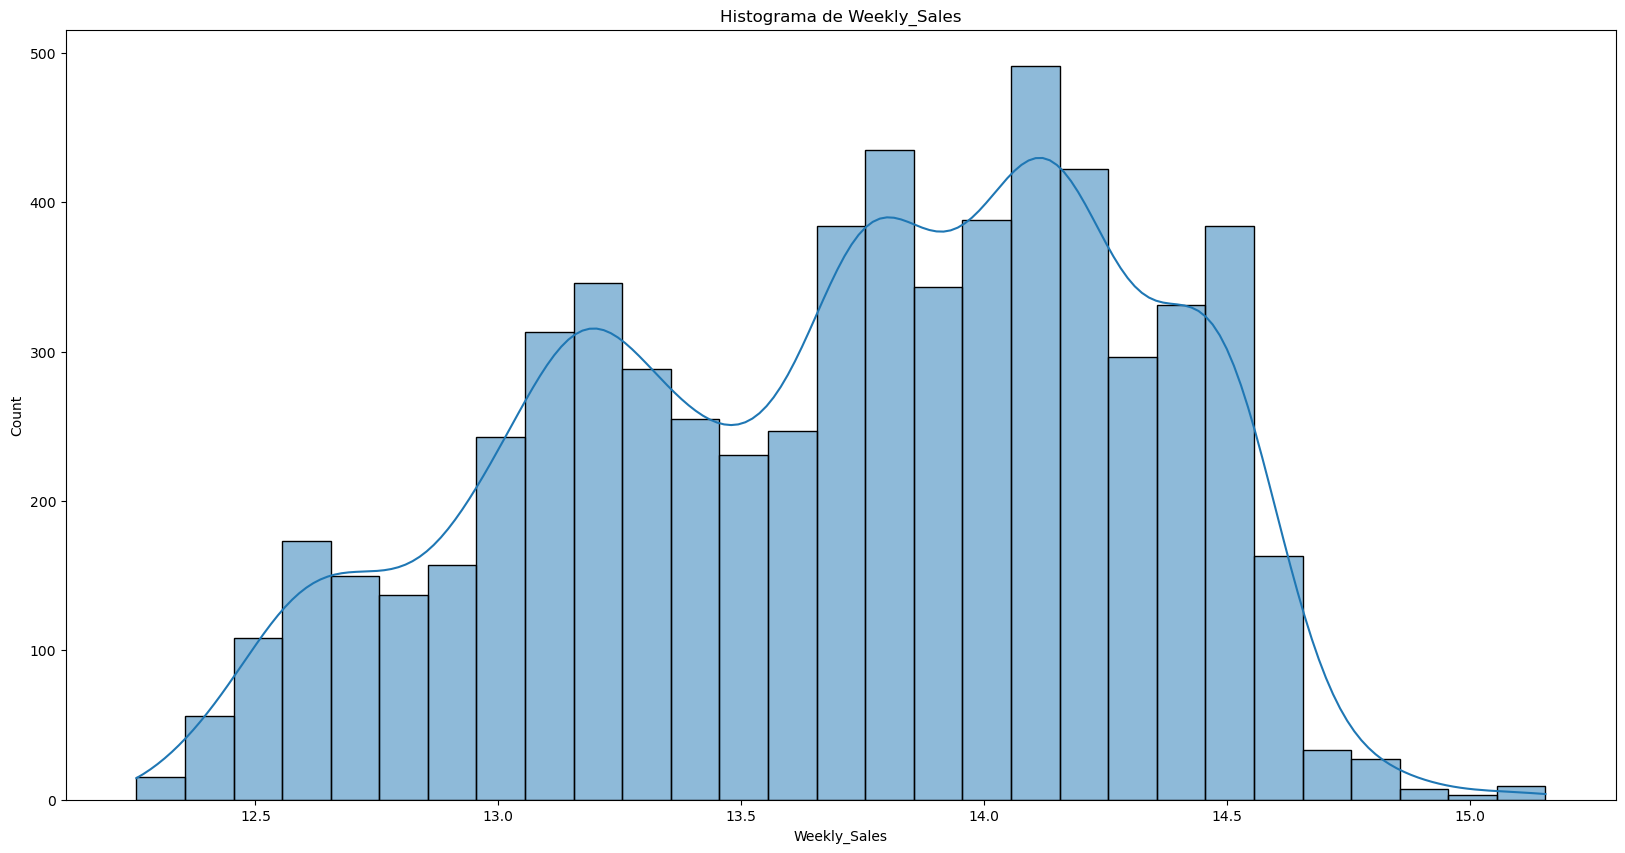

In [23]:
ax = sns.histplot(data=df_transformado, x='Weekly_Sales', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de Weekly_Sales')
ax.set_xlabel('Weekly_Sales');

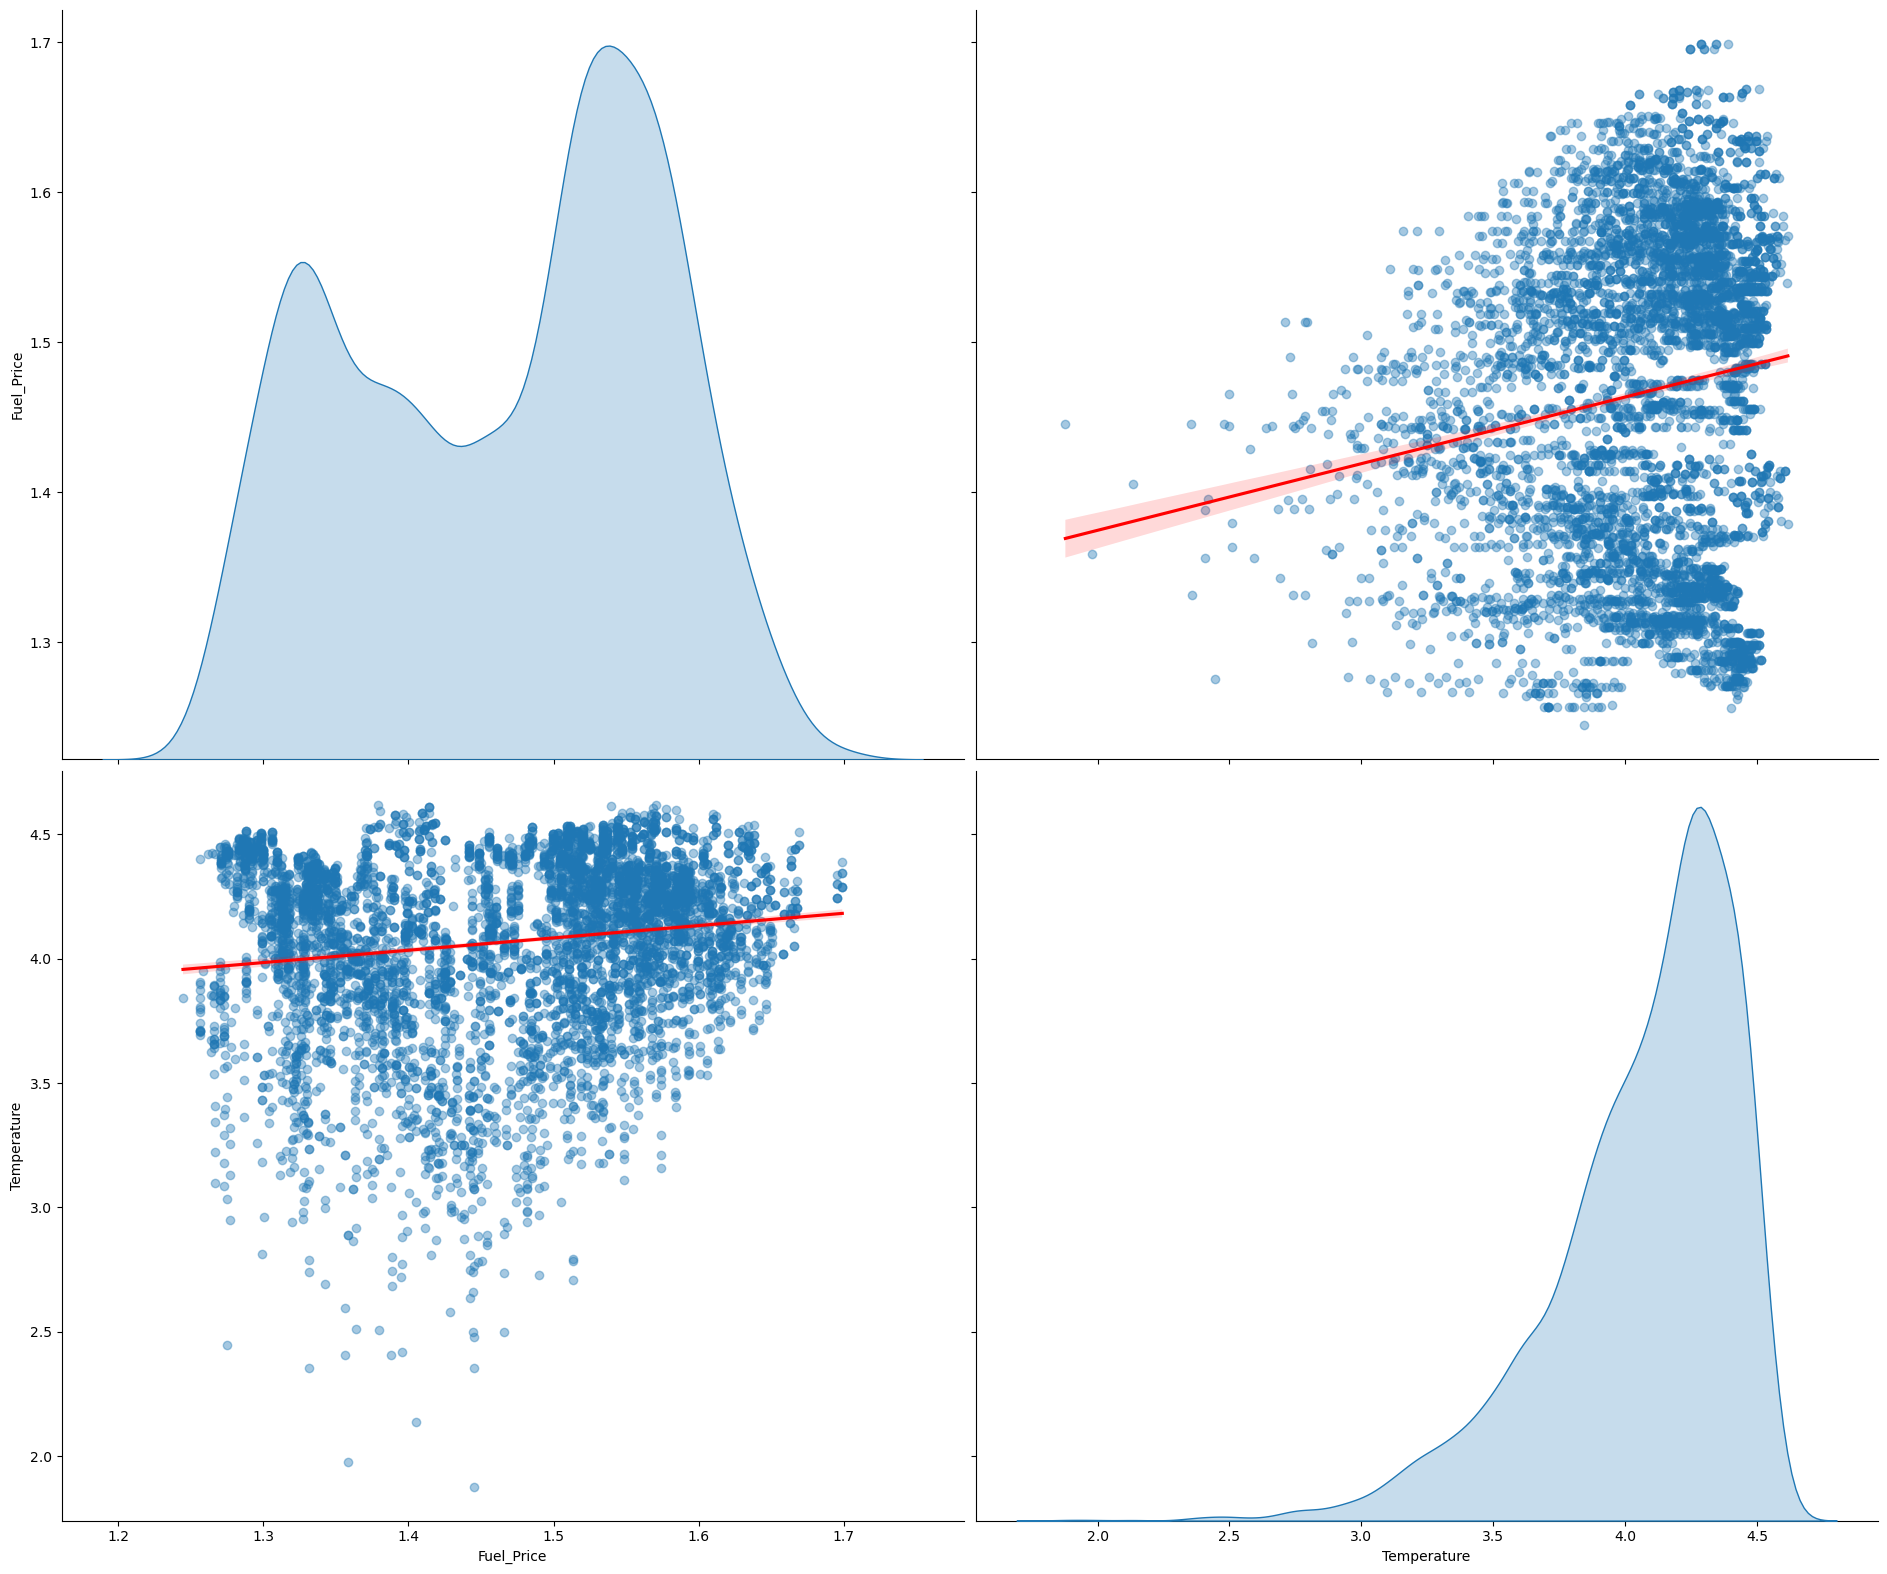

In [24]:
sns.pairplot(df_transformado[['Fuel_Price', 'Temperature']], 
             kind='reg', 
             diag_kind='kde', 
             height=8, 
             aspect=1.2, 
             plot_kws={'line_kws':{'color':'red'}, 
                       'scatter_kws': {'alpha': 0.4}}
            )
plt.show()

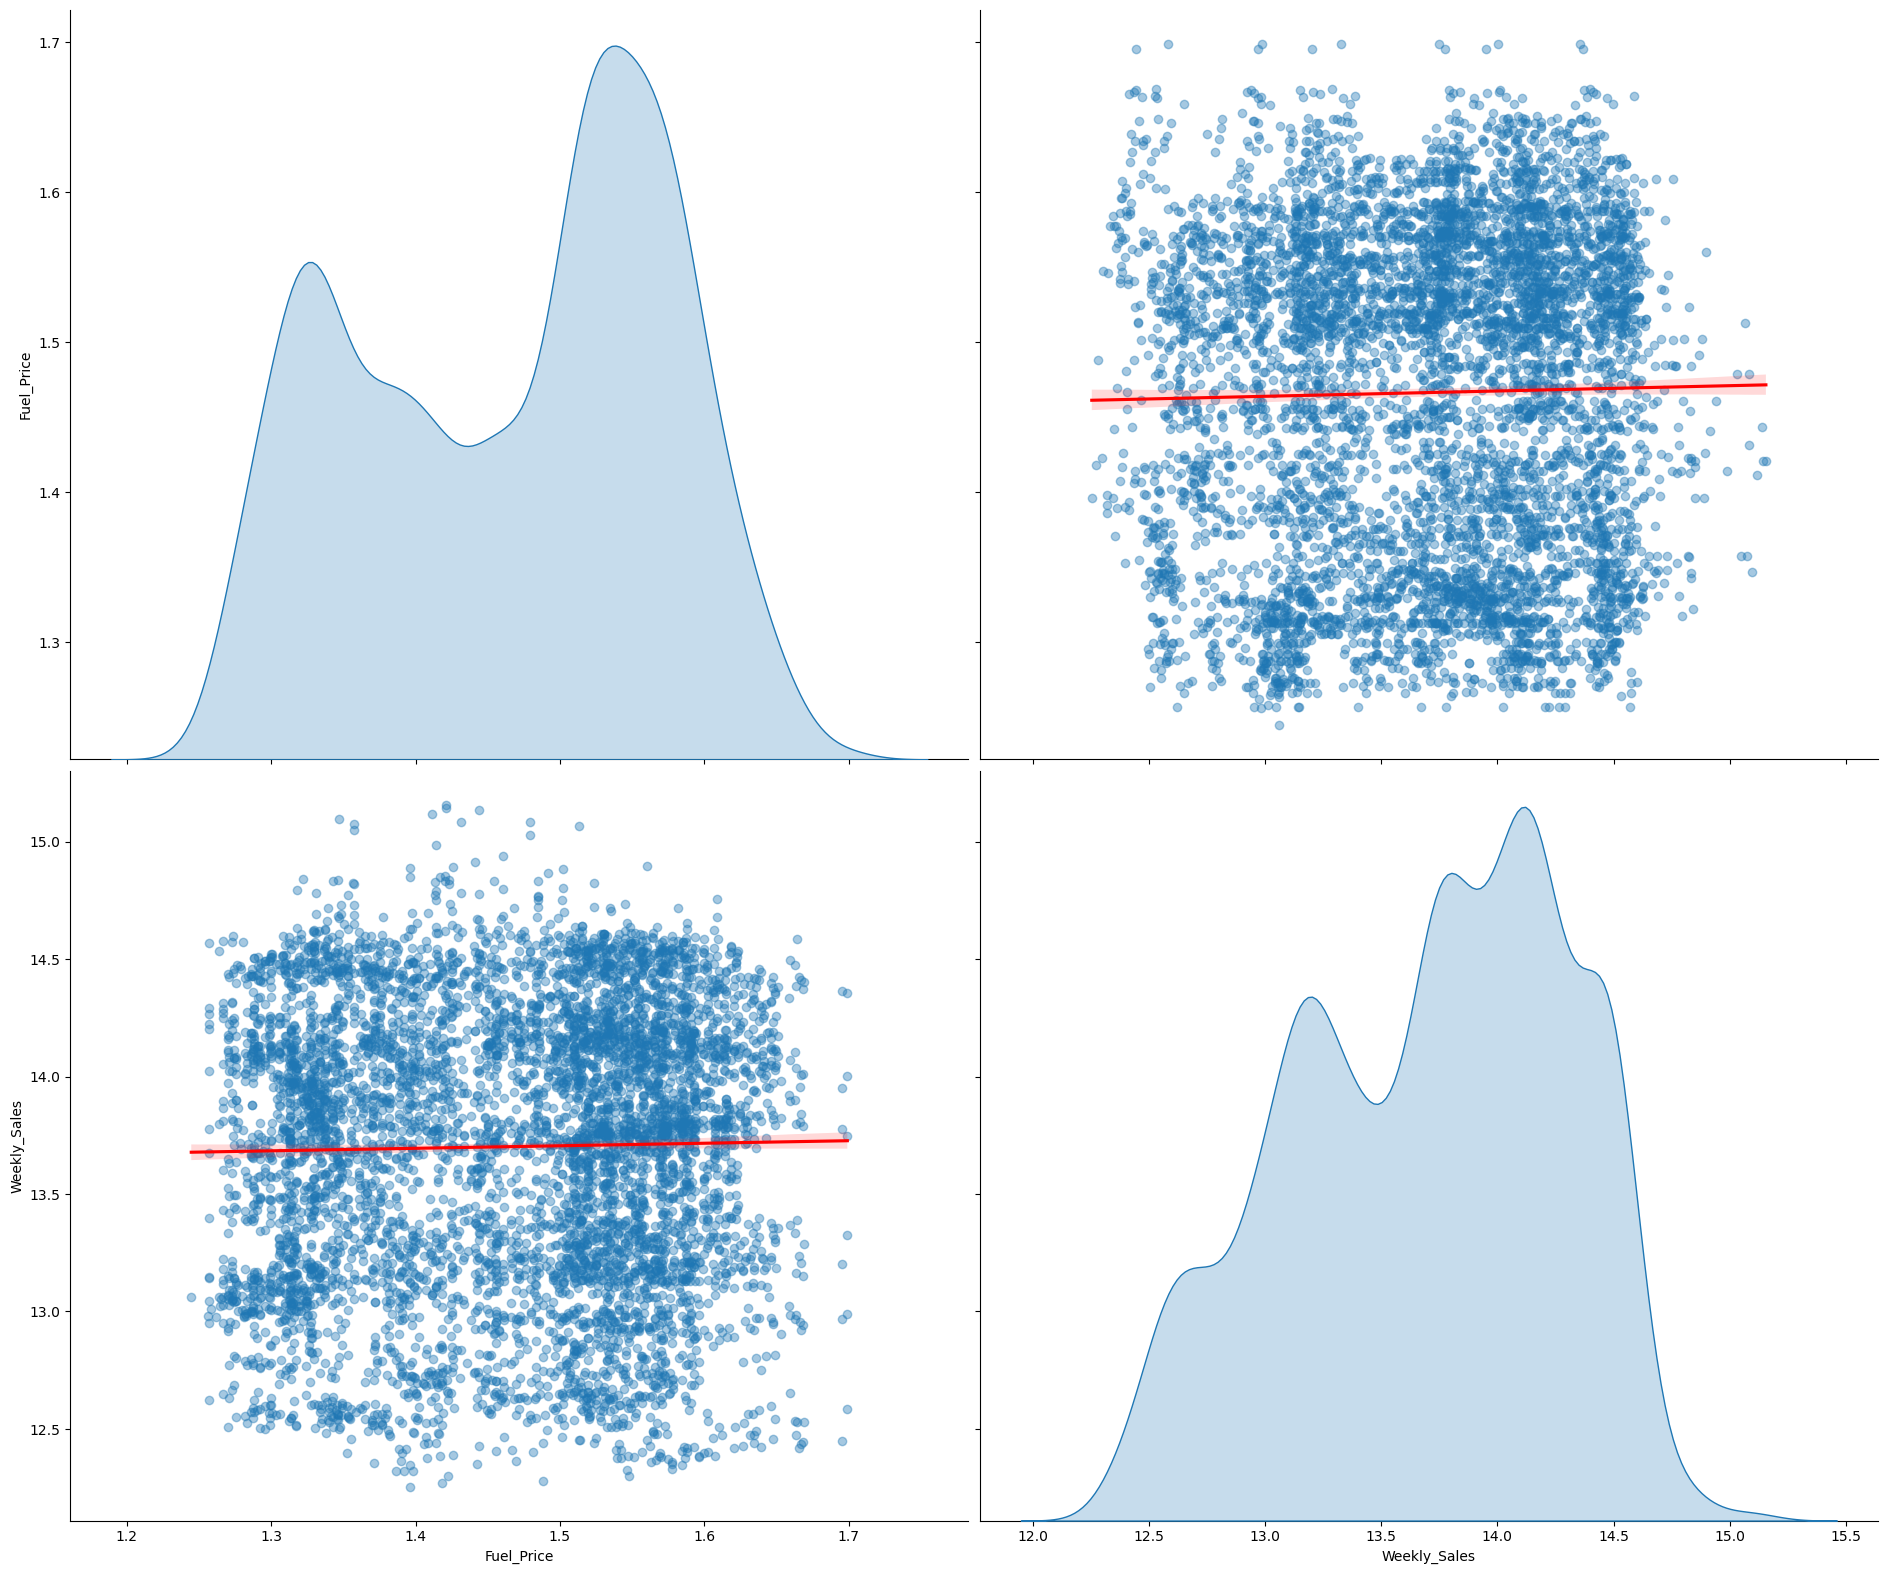

In [25]:
sns.pairplot(df_transformado[['Fuel_Price', 'Weekly_Sales']], 
             kind='reg', 
             diag_kind='kde', 
             height=8, 
             aspect=1.2, 
             plot_kws={'line_kws':{'color':'red'}, 
                       'scatter_kws': {'alpha': 0.4}}
            )
plt.show()

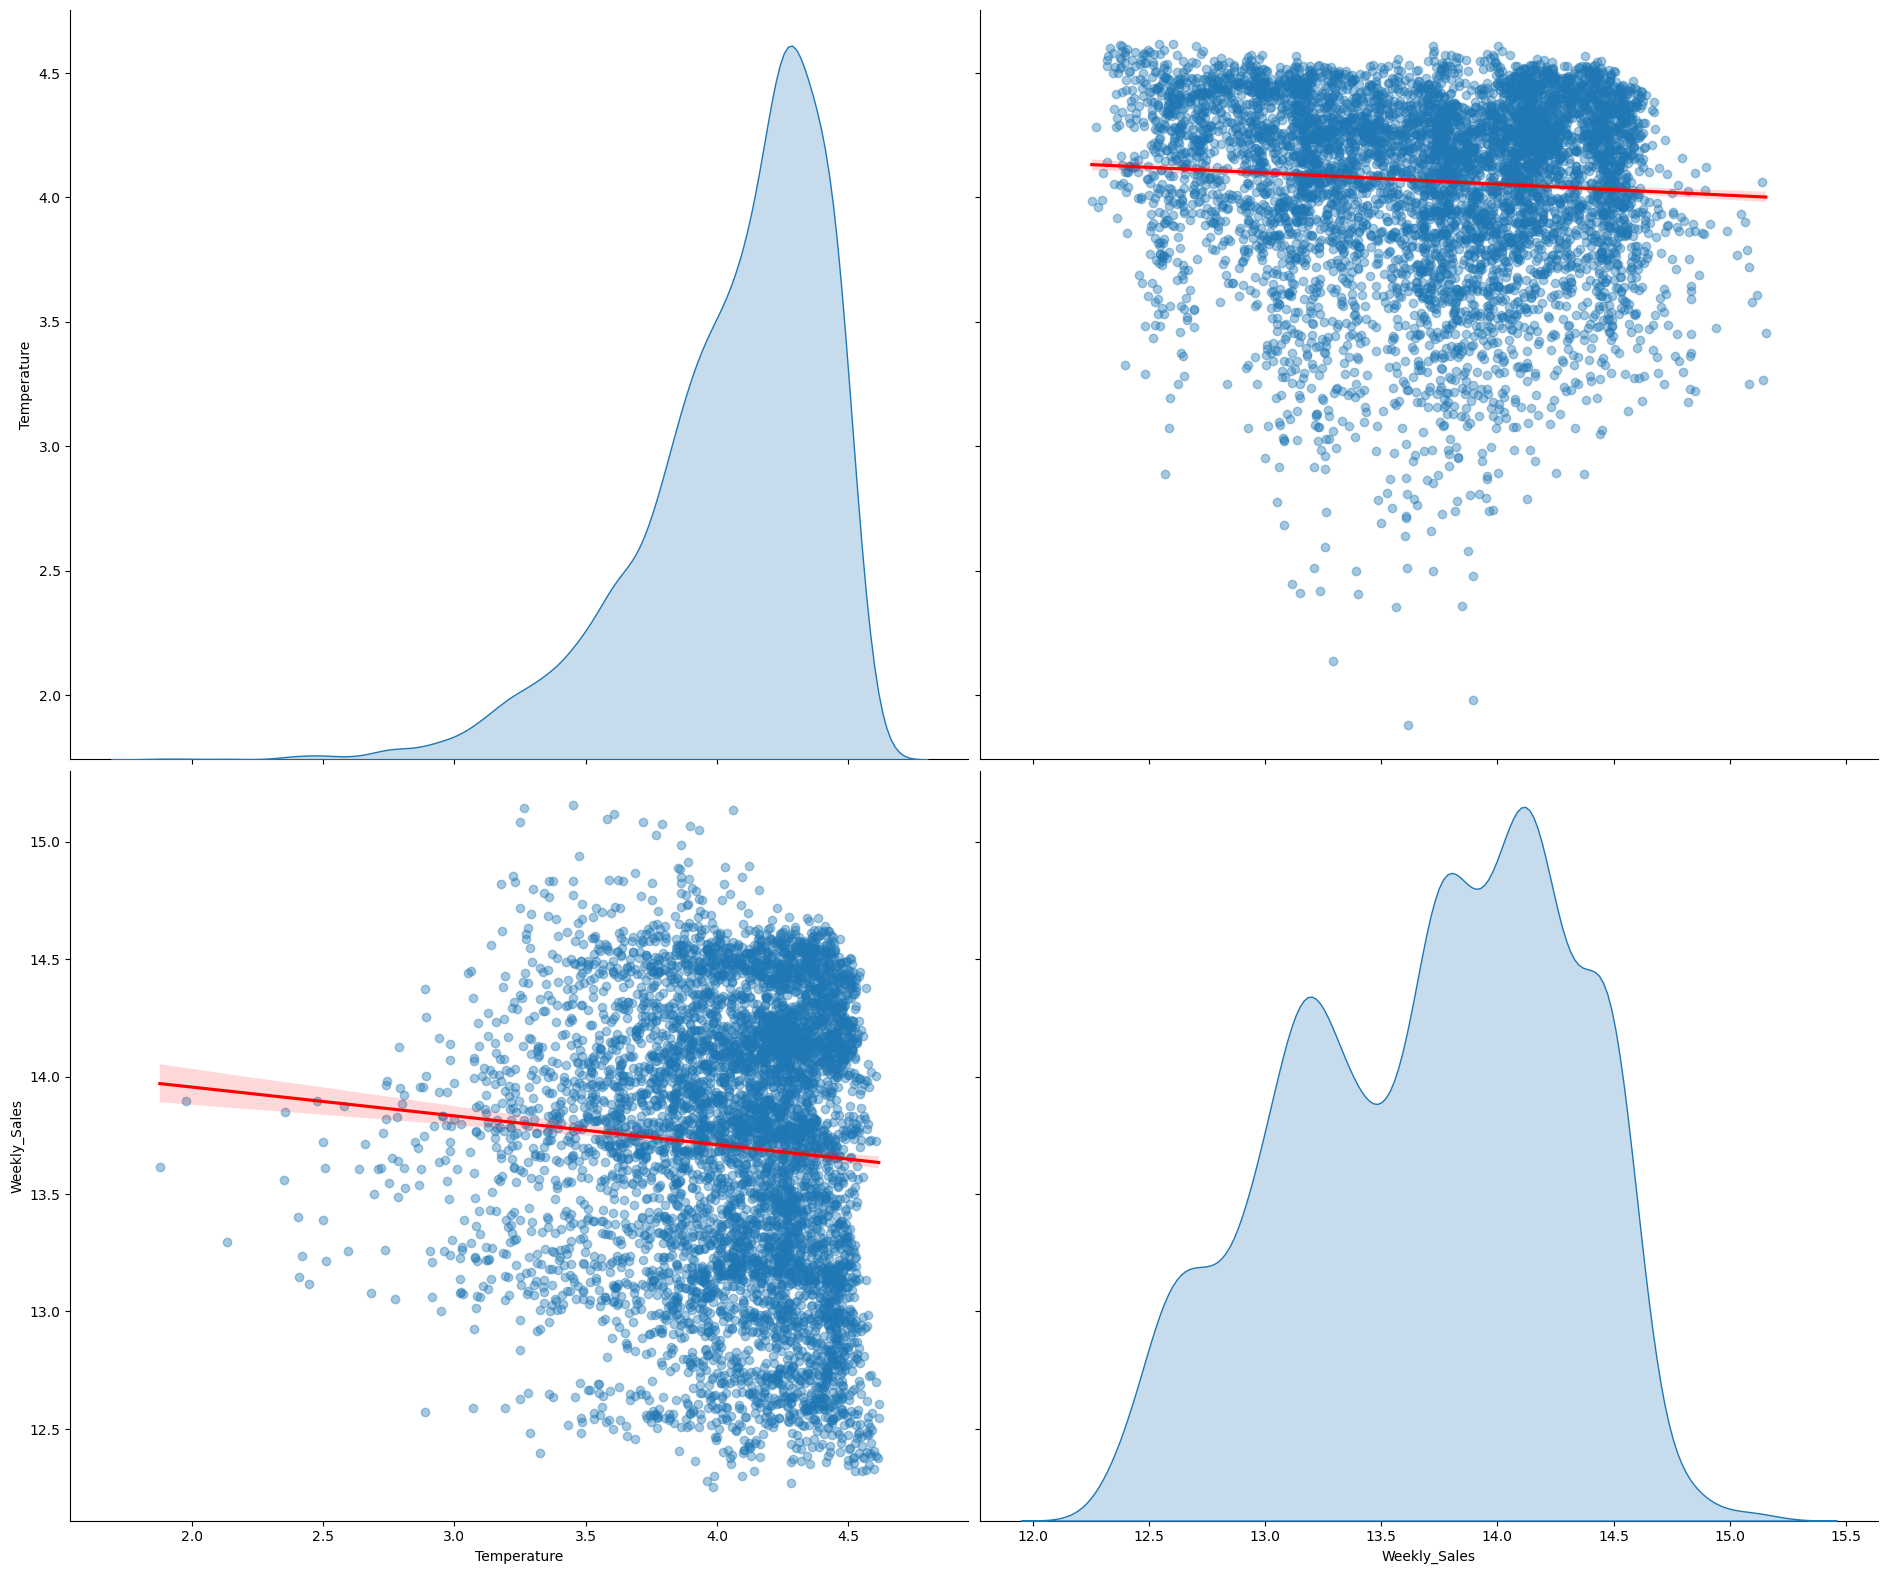

In [26]:
sns.pairplot(df_transformado[['Temperature', 'Weekly_Sales']], 
             kind='reg', 
             diag_kind='kde', 
             height=8, 
             aspect=1.2, 
             plot_kws={'line_kws':{'color':'red'}, 
                       'scatter_kws': {'alpha': 0.4}}
            )
plt.show()

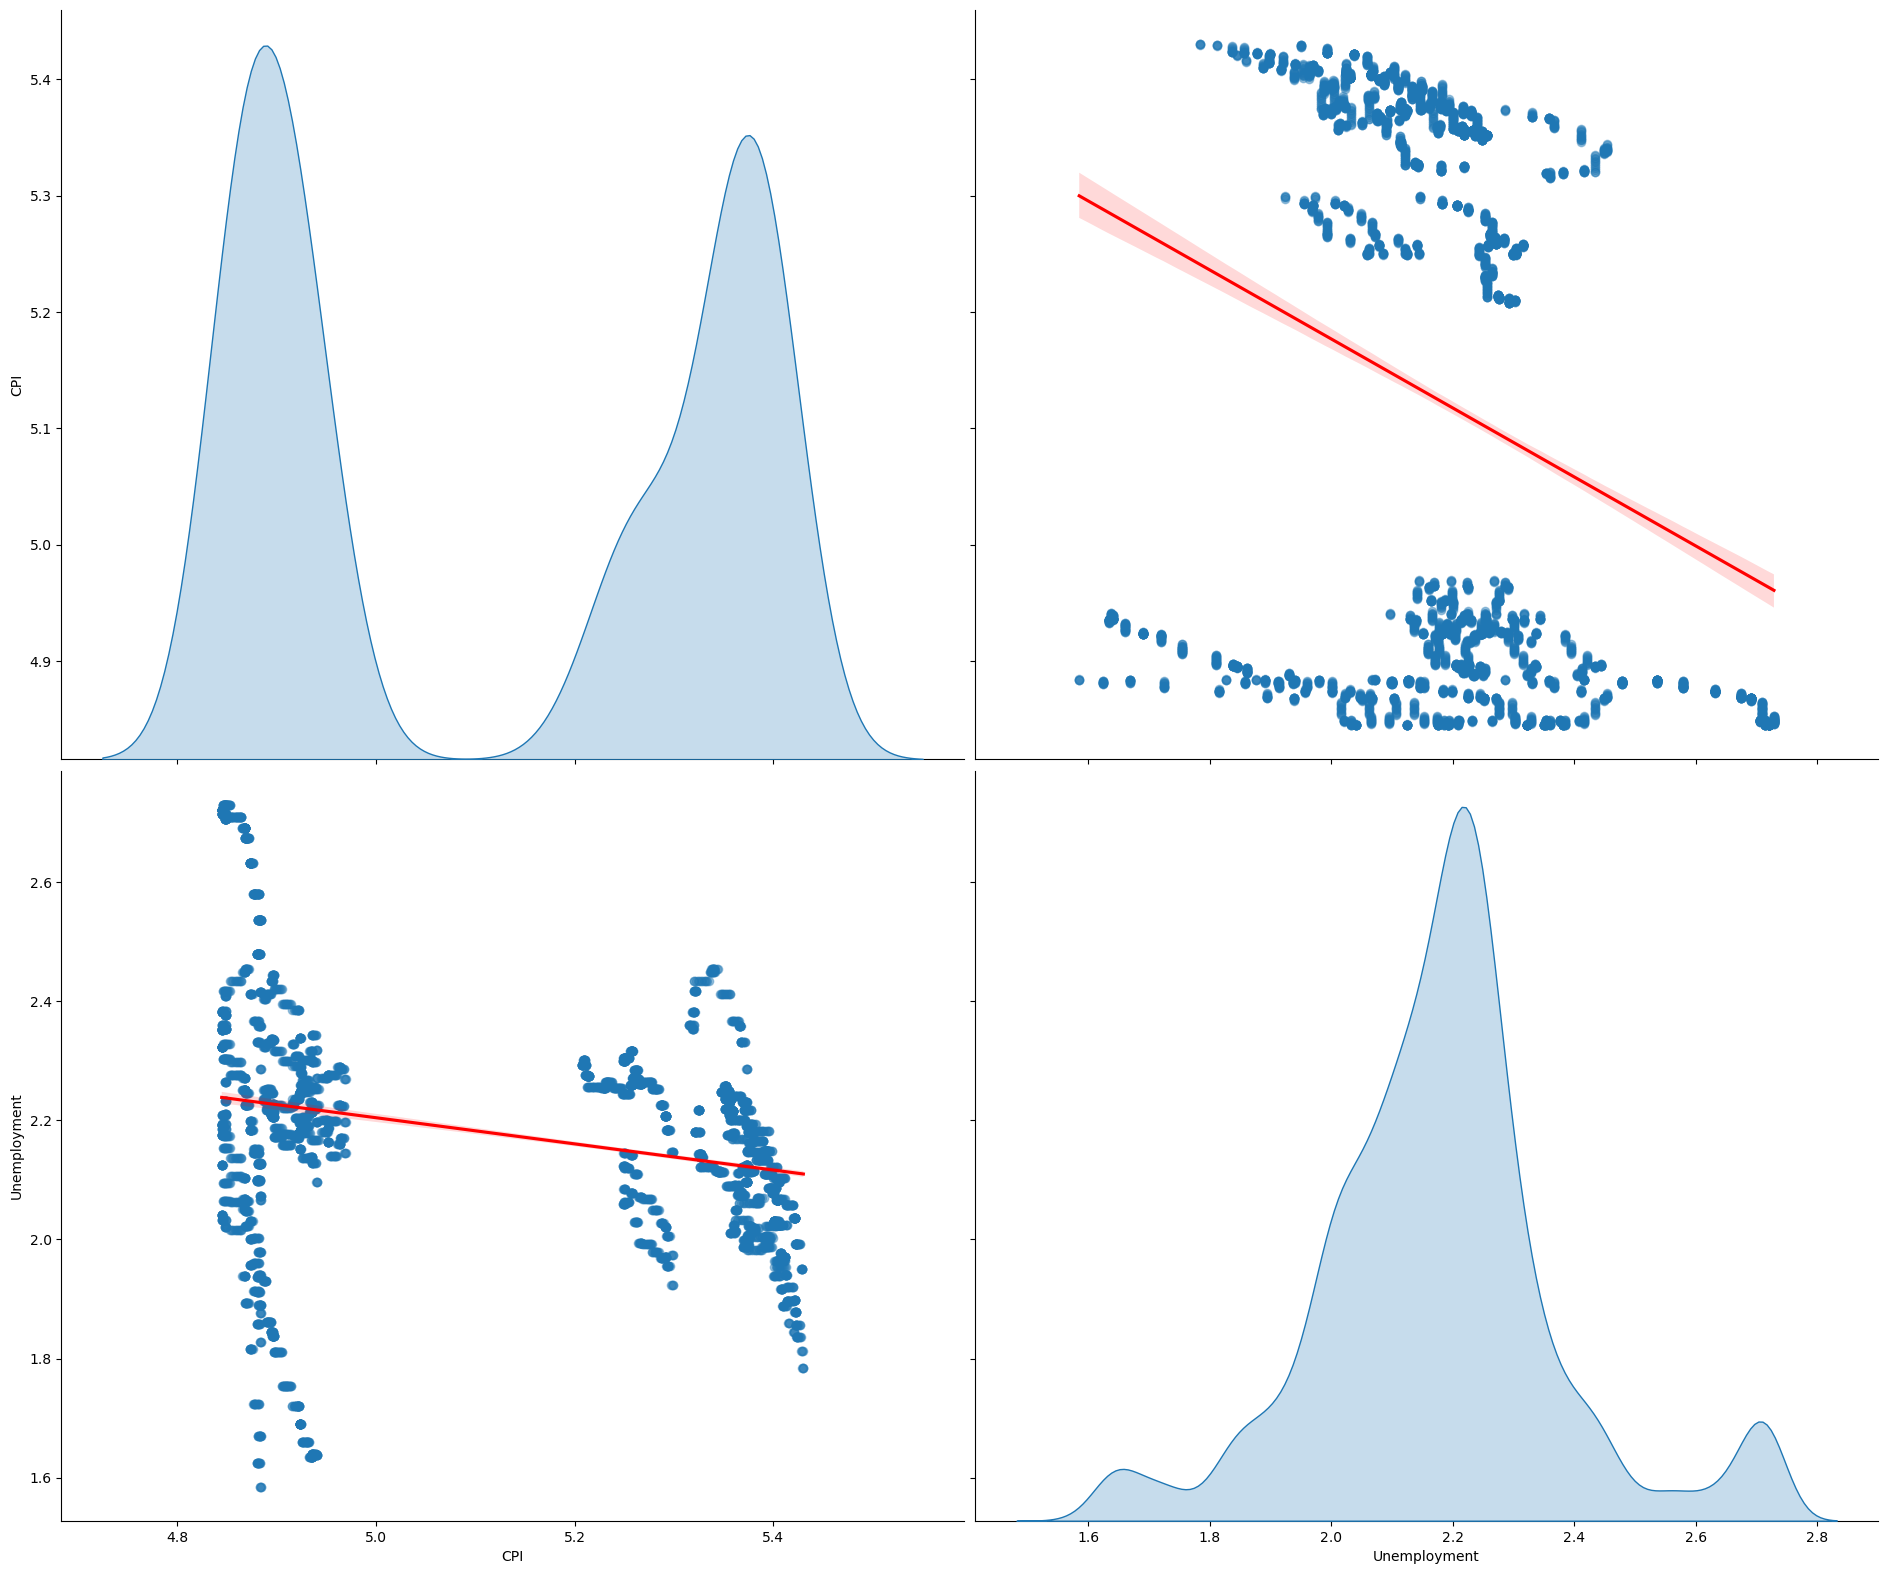

In [27]:
sns.pairplot(df_transformado[['CPI', 'Unemployment']], 
             kind='reg', 
             diag_kind='kde', 
             height=8, 
             aspect=1.2, 
             plot_kws={'line_kws':{'color':'red'}, 
                       'scatter_kws': {'alpha': 0.4}}
            )
plt.show()

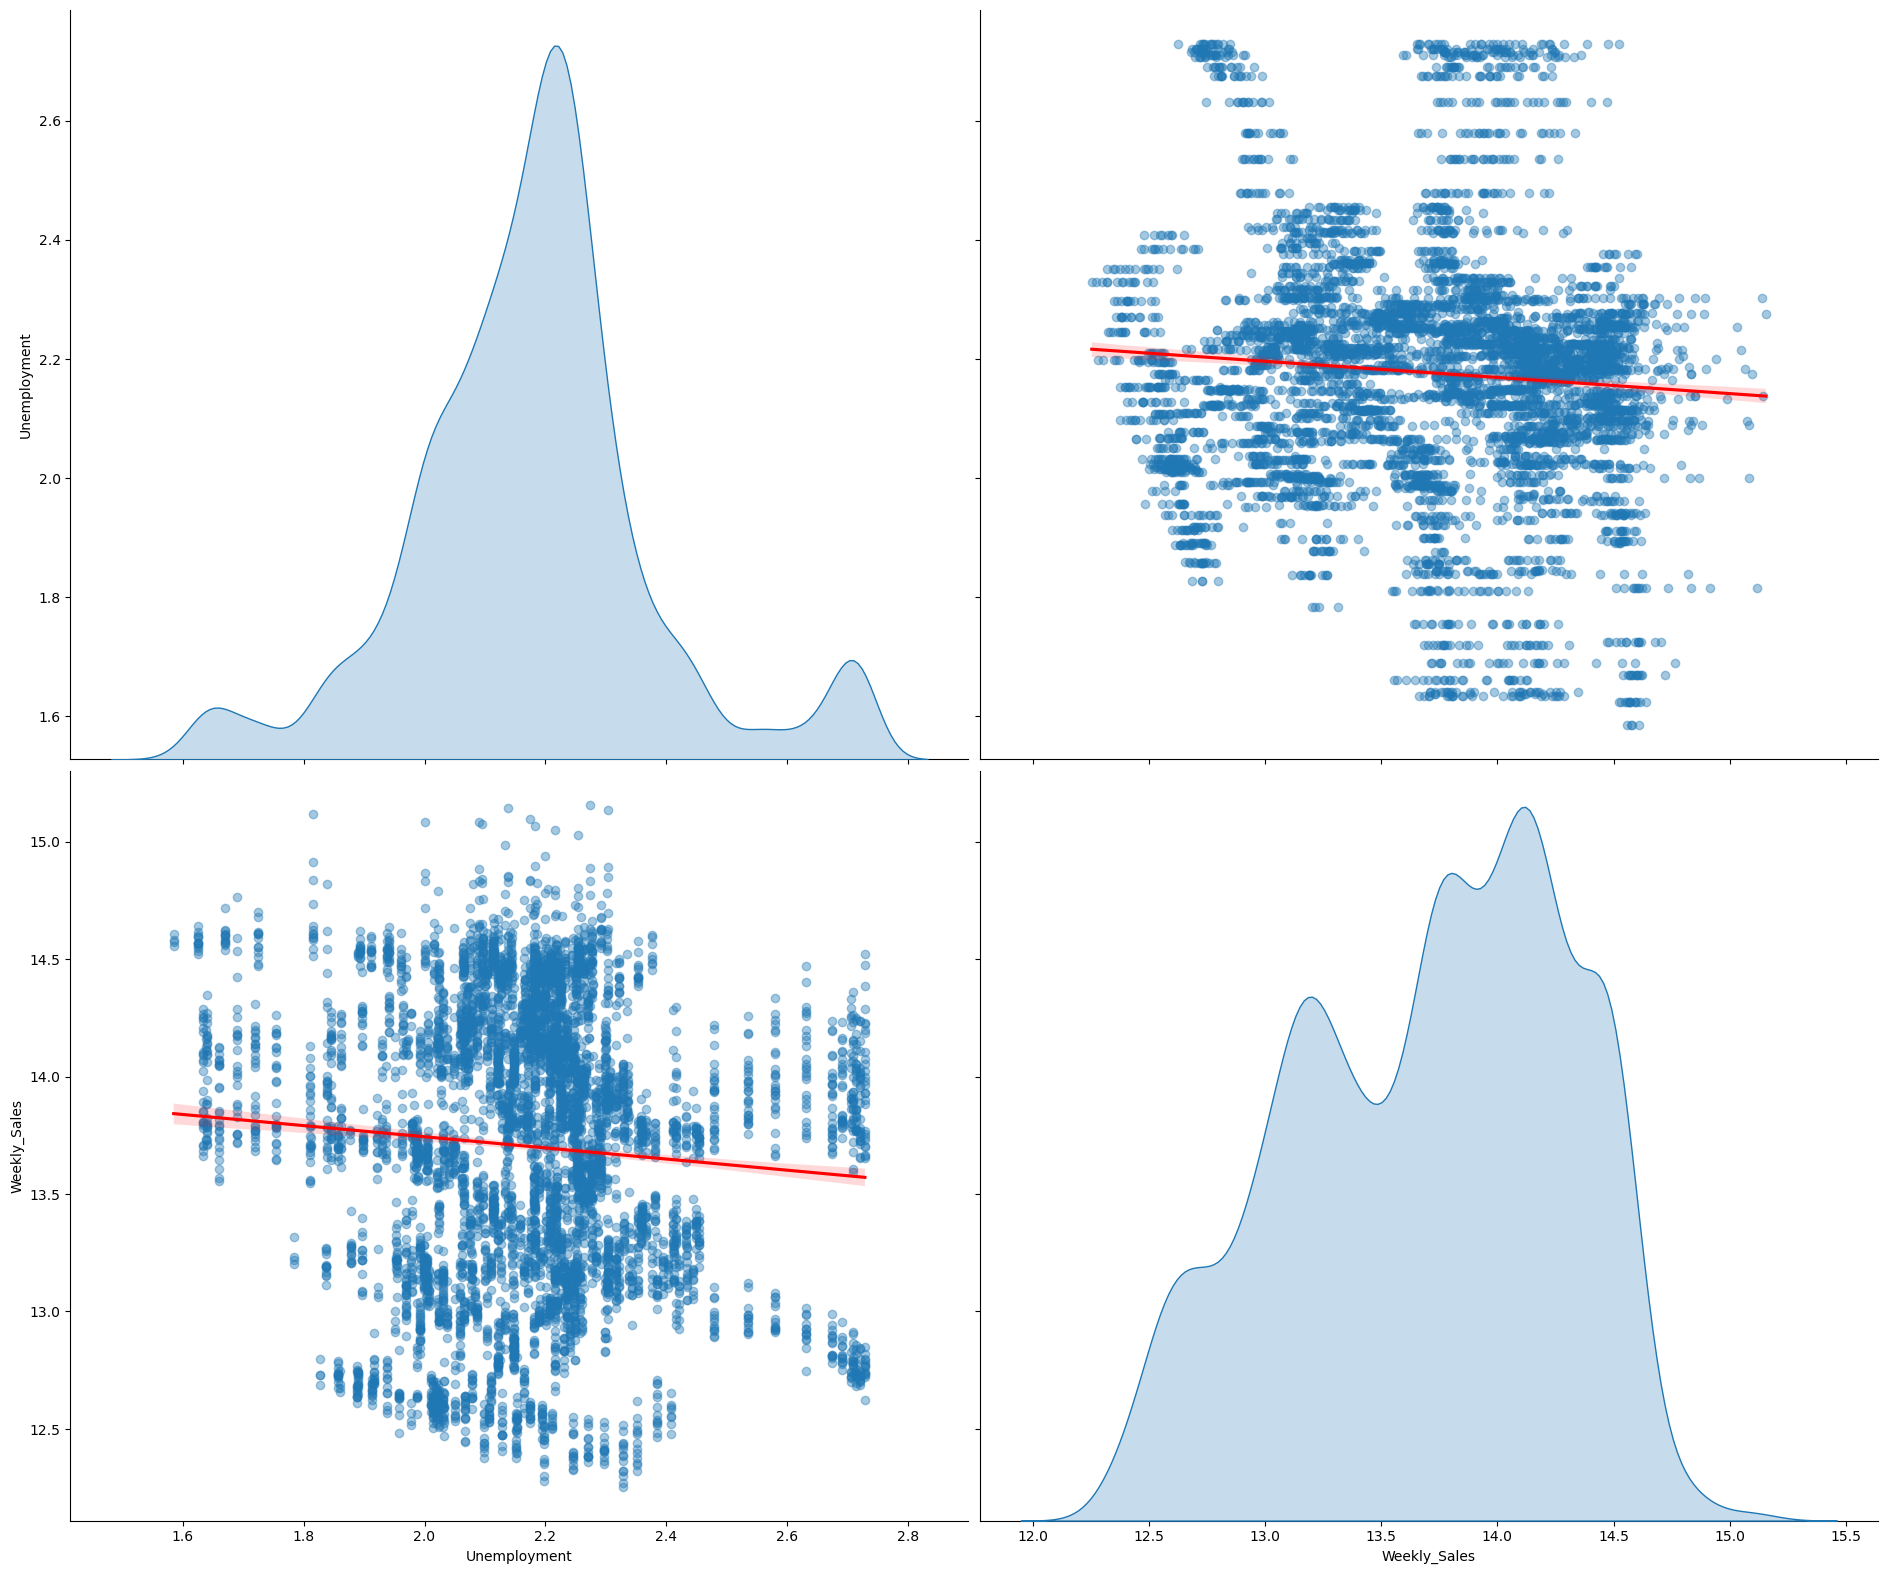

In [28]:
sns.pairplot(df_transformado[['Unemployment', 'Weekly_Sales']], 
             kind='reg', 
             diag_kind='kde', 
             height=8, 
             aspect=1.2, 
             plot_kws={'line_kws':{'color':'red'}, 
                       'scatter_kws': {'alpha': 0.4}}
            )
plt.show()

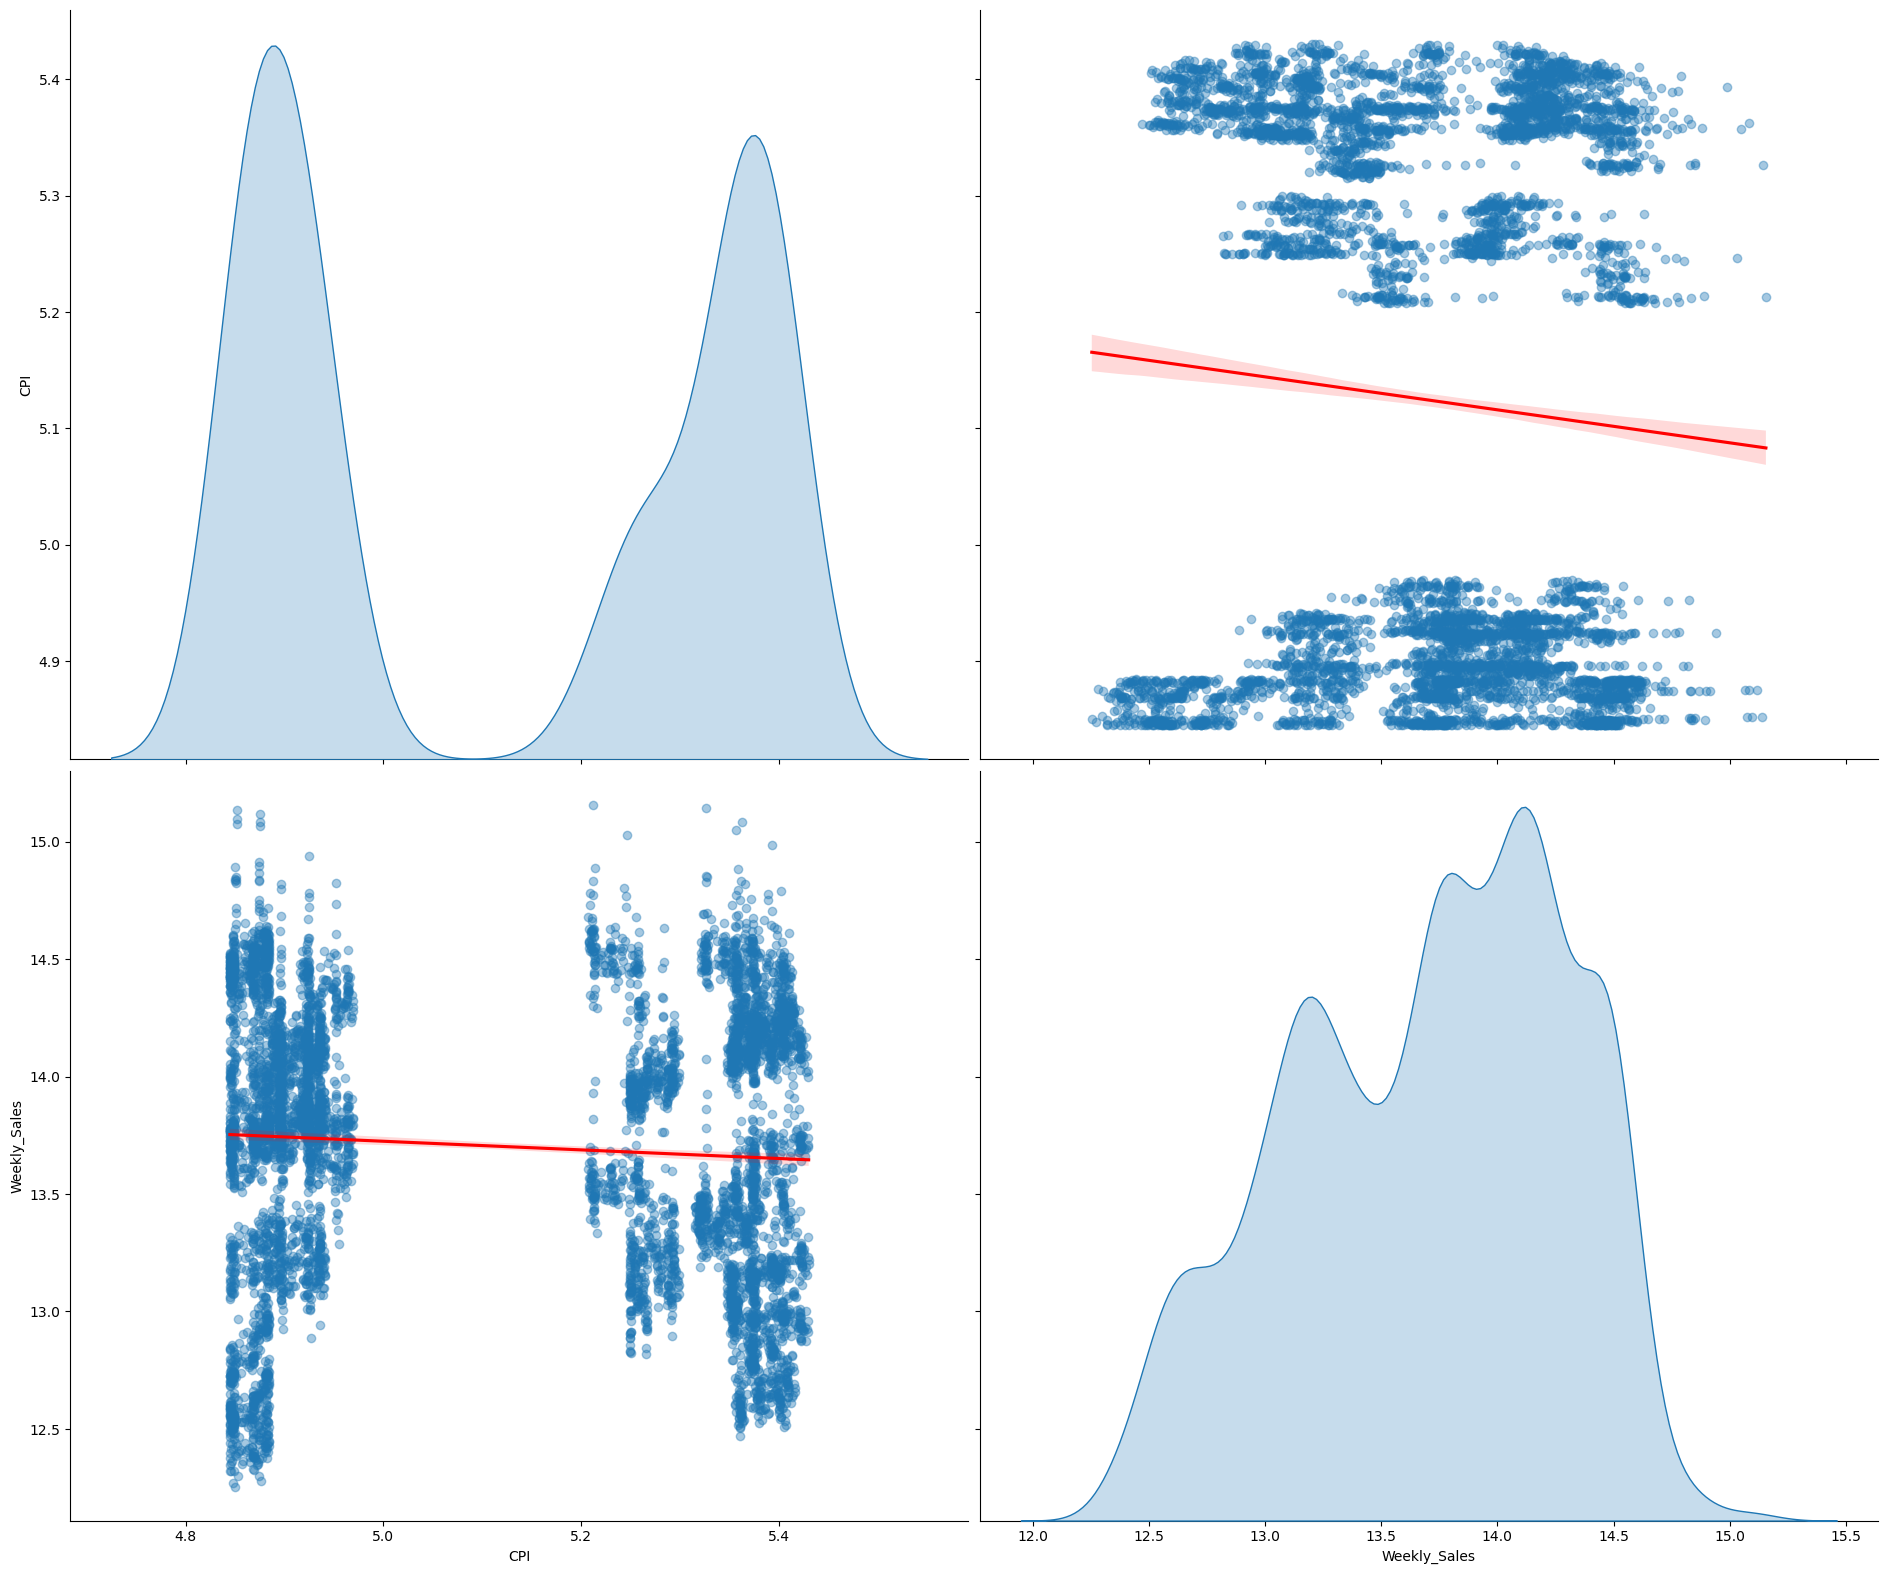

In [29]:
sns.pairplot(df_transformado[['CPI', 'Weekly_Sales']], 
             kind='reg', 
             diag_kind='kde', 
             height=8, 
             aspect=1.2, 
             plot_kws={'line_kws':{'color':'red'}, 
                       'scatter_kws': {'alpha': 0.4}}
            )
plt.show()

In [109]:
#variables independientes
X = df_transformado.drop('Weekly_Sales', axis=1)

#variable dependiente
y = df_transformado['Weekly_Sales']

In [31]:
from sklearn.model_selection import train_test_split

In [79]:
#división en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [80]:
print('X_train:', len(X_train)) 
print('X_test:', len(X_test))
print('y_train:', len(y_train))
print('y_test:', len(y_test))

X_train: 4504
X_test: 1931
y_train: 4504
y_test: 1931


In [34]:
from sklearn.linear_model import LinearRegression

In [81]:
#Inicializando el modelo
lr = LinearRegression()

In [82]:
#Entrenamiento
lr.fit(X_train, y_train)

LinearRegression()

In [83]:
#Prueba
prediccion_lr = lr.predict(X_test)

In [84]:
#Resultados de la predicción
prediccion_lr

array([13.78061102, 13.71167791, 13.97721628, ..., 13.53046495,
       13.95195376, 13.6452966 ])

In [85]:
#transformación inversa
np.expm1(prediccion_lr)

array([ 965701.42867295,  901375.12908906, 1175513.25678868, ...,
        751978.95858613, 1146188.77506298,  843483.32835014])

In [40]:
#importar la biblioteca
from sklearn.metrics import r2_score

In [86]:
r2_lr = r2_score(y_test, prediccion_lr)
r2_lr

0.09544298701038845

In [75]:
 from sklearn.metrics import mean_absolute_error

In [87]:
mean_absolute_error(y_test, prediccion_lr)

0.46389016556864865

In [77]:
from sklearn.metrics import mean_squared_error

In [88]:
mean_squared_error(y_test, prediccion_lr)

0.31889849635834167

In [101]:
#variables independientes
Z = df2.drop('Weekly_Sales', axis=1)

#variable dependiente
k = df2['Weekly_Sales']

In [102]:
#división en conjunto de entrenamiento y prueba
Z_train, Z_test, k_train, k_test = train_test_split(Z, k, test_size=0.3, random_state=42)

In [103]:
print('X_train:', len(Z_train)) 
print('X_test:', len(Z_test))
print('y_train:', len(k_train))
print('y_test:', len(k_test))

X_train: 4504
X_test: 1931
y_train: 4504
y_test: 1931


In [104]:
lr = LinearRegression()

In [105]:
lr.fit(Z_train, k_train)

LinearRegression()

In [106]:
prediccion_lr = lr.predict(Z_test)

In [107]:
prediccion_lr

array([1189201.1247038 , 1095369.88513882, 1253765.58991547, ...,
        839390.02668471, 1234679.98546098,  977233.45673315])

In [108]:
r2_lr = r2_score(k_test, prediccion_lr)
r2_lr

0.14823448916332116

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90, random_state=42)

# Crear el modelo de regresión lineal
linear_regression = LinearRegression(fit_intercept=True, normalize=False)

# Entrenar el modelo
linear_regression.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions = linear_regression.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.31878568012574804


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


In [121]:
predictions

array([13.74302825, 13.74046683, 14.04621201, ..., 13.46447124,
       13.78864872, 13.48292329])